In [76]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

A Little Statistics

Question 1

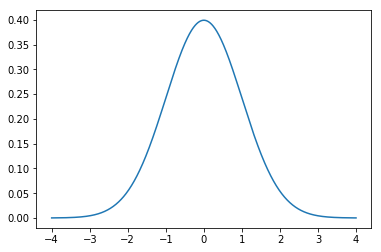

In [73]:
# Part A
# Instruction: Look up the Normal distribution and read about it. A few potential starting points:
# Math is fun, Wolfram, and a useful z table

sigma = 1; # standard deviation at one
mu = 0;    # average at zero

fig = plt.figure()
ax = plt.axes()

x = np.linspace(-4,4,1000); # x axis
ax.plot(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))) # equation for norm dist

plt.show() # graph of normal distribution

In [74]:
# Part B
# Instruction: As in class, try integrating the standard normal distribution. This can be done either
# with the erfc(), or calls to specific statistical cumulative probability distributions such as normcdf()
# in MatLab or stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values
# that match the z-table. 

normDisInput = [0,1,2,3,4,5];                 # different value of sigma
normDisOutput = stats.norm.cdf(normDisInput); # integrating std norm dist with sigma values
print(normDisOutput)

# The total area, from negative infinity to positive infinity, is equal to one.
# The function used above is to integrate the standard normal distribution.
# In the case of this problem, we are integrating from negative infinity up to different values of sigma.
# The resulting value is the area to the left of the sigma value, under the graph.

[ 0.5         0.84134475  0.97724987  0.9986501   0.99996833  0.99999971]


In [20]:
# Part C
# Instruction: Now more often than not, we actually want to do the inverse: for a given probability
# determine the associated 'sigma' value: norminv() or erfcinv() in MatLab; stats.norm.ppf() in python.
# Try several probability values where you know what the answer should be (e.g. Probability associated
# with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.

inversely = stats.norm.ppf(normDisOutput); # input is the values found previously
print(inversely) # inverse should get back the sigma values

# After finding the decimal values from the previous section, we can use the solutions to see that the inverse
# will get us the original results.
# The decimal values are the partial areas under the curve that is left of the associated sigma value.

[ 0.  1.  2.  3.  4.  5.]


In [24]:
# Part D
# Instruction: Think about and explain the meaning of the minus sign that appears, and discuss how you
# will deal with it. 

otherInput = [0.1,0.2,0.3,0.4,0.5];
inversely2 = stats.norm.ppf(otherInput);
print(inversely2)

# Putting in areas of less than 0.5 would result in negative output.
# Since the curve is centered on zero, and an area of 0.5 signifies the area left of the y-axis, any value less
# than 0.5 would give us a negative sigma value.
# This can be dealt with by shifting the entire distribution to the right.
# The extent to be the desired sigma that we are looking for.

[-1.28155157 -0.84162123 -0.52440051 -0.2533471   0.        ]


Question 2

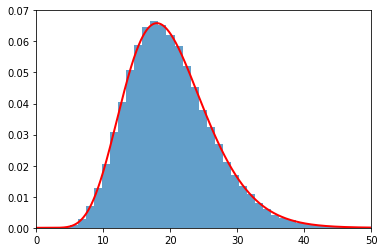

In [90]:
# Part A and B
# Instruction: Read up on your distribution. Make plots (tweaking distribution and plot parameters as needed).

fig, ax = plt.subplots(1, 1)

d = stats.chi2.rvs(df = 20, size = 100000)

plt.tick_params(labelsize = 10)
plt.xlim([0,50])
x = np.linspace(0,100,100000)

ax.hist(d, 50, normed = True, alpha = 0.7)

ax.plot(x,stats.chi2.pdf(x,df = 20),'r-',linewidth = 2)
plt.show()

# This section represents the chi-square distribution.

Non-continuous Distributions

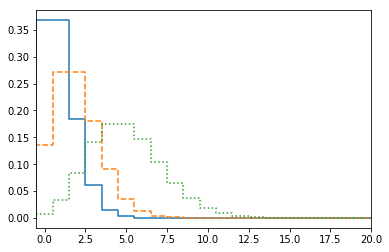

In [84]:
# Part B
# Instruction: Make a series of plots with different parameters; and explain the features. 
# (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful). 

parameters = [1,2,5]
linestyle = ['-','--',':']

fig, ax = plt.subplots()

for mu, ls in zip(parameters, linestyle):
    d = stats.poisson(mu)
    x = np.arange(-1,100)
    
    plt.plot(x, d.pmf(x), linestyle = 'steps-mid' + ls)
    
plt.xlim(-0.5,20)
plt.show()

# Three poisson distributions with different parameter mu or lambda(in some other texts).
# This paramter indicates the average number of events per interval.
# From the plot, more occurances allows for more number of events, and the probability decreases as both
# occurances and events increase.
# The graph is taken from J. Vanderplas at https://www.astroml.org/book_figures/chapter3/fig_poisson_distribution.html